Vsevolod Klyushev v.klyushev@innopolis.university

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing

Load data

In [344]:
data = pd.read_csv('a1_dataset.csv')
data.head(5)

,target,var1,var2,var3,var4,var5,var6,var7
0,0,509.18,417.681,Micronesia,138.0,393.00,no,2019-07-20 13:21:37
1,0,446.06,666.182,Dominica,81.0,352.05,yes,2019-04-04 21:30:46
2,1,235.50,398.097,Isle of Man,90.0,339.00,no,2019-03-03 02:59:37
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes,2019-03-19 08:00:58
4,0,453.08,600.156,Cameroon,105.0,422.95,no,2019-03-18 13:22:35


## Encoding categorical data

Ordinal encoding

In [345]:
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encoding(data, column):
    new_data = data.copy()
    encoder = OrdinalEncoder()
    data_col = np.array(new_data[column])
    data_col = np.reshape(data_col, (len(data_col),1))
    new_data[column] = encoder.fit_transform(data_col)
    return new_data

One-hot encoding

In [346]:
def one_hot_encoding(data, column):
    new_data = data.copy()
    new_data = pd.get_dummies(new_data, columns=[column], prefix=column)
    return new_data


Cyclical encoding (for time data)

In [347]:
def cyclical_encoding(data, column, period):
    data[column+'_sin'] = np.sin(data[column]*2*np.pi/period)
    data[column+'_cos'] = np.cos(data[column]*2*np.pi/period)
    data = data.drop(columns=[column])


Date encoding

In [348]:
import re 

def date_encoding(data, column):
    new_data = data.copy()
    time = []
    for elem in new_data[column]:
        y,m,d,h,mi,s = map(int, re.split('-|:| ',elem))
        time.append((y,m,d,h,mi,s))
    time = pd.DataFrame(time,columns=['year','month','day','hour','min','sec'])
    cyclical_encoding(time, 'year', len(time['year'].unique()))
    cyclical_encoding(time, 'month', 12)
    cyclical_encoding(time, 'day', 31)
    cyclical_encoding(time, 'hour', 24)
    cyclical_encoding(time, 'min', 60)
    cyclical_encoding(time, 'sec', 60)
    time = time.drop(columns=['year','month','day','hour','min','sec'])
    time = time.drop(columns=['year_sin','year_cos']) # since year is the same in all data, I decided to drop it
    new_data = pd.concat([new_data, time], axis=1)
    new_data = new_data.drop(columns=[column])
    return new_data

Let's see how many unique values there are in categorical columns:

In [349]:
df  = pd.DataFrame(data)
print('var6 unique values:',df['var6'].unique())
print('var3 number of countries',df['var3'].unique().shape[0])

var6 unique values: ['no' 'yes']
var3 number of countries 236


Because column 'var6' has only 2 values 'yes' and 'no', I decided to encode it using ordinal encoding. There are quite a lot of values in column 'var3', it can be encoded using ordinal encoding or one-hot encoding. Column 'var7' with the date can be dropped or encoded using cyclic encoding. Thus, the categorical data in the original dataset can be encoded in 4 ways. Let's create 4 datasets corresponding to each encoding option.

In [350]:
df  = pd.DataFrame(data)
df1 = ordinal_encoding(df,'var6')
df_ord_country = ordinal_encoding(df1,'var3')
df_one_hot_country = one_hot_encoding(df1,'var3')
df_ord_country_with_date = date_encoding(df_ord_country,'var7')
df_one_hot_country_with_date = date_encoding(df_one_hot_country,'var7')
df_ord_country = df_ord_country.drop(columns=['var7'])
df_one_hot_country = df_one_hot_country.drop(columns=['var7'])

In [351]:
df1.head()

,target,var1,var2,var3,var4,var5,var6,var7
0,0,509.18,417.681,Micronesia,138.0,393.00,0.0,2019-07-20 13:21:37
1,0,446.06,666.182,Dominica,81.0,352.05,1.0,2019-04-04 21:30:46
2,1,235.50,398.097,Isle of Man,90.0,339.00,0.0,2019-03-03 02:59:37
3,0,306.02,518.163,Turkmenistan,102.0,439.25,1.0,2019-03-19 08:00:58
4,0,453.08,600.156,Cameroon,105.0,422.95,0.0,2019-03-18 13:22:35


In [352]:
df_ord_country.head()

,target,var1,var2,var3,var4,var5,var6
0,0,509.18,417.681,137.0,138.0,393.00,0.0
1,0,446.06,666.182,57.0,81.0,352.05,1.0
2,1,235.50,398.097,101.0,90.0,339.00,0.0
3,0,306.02,518.163,216.0,102.0,439.25,1.0
4,0,453.08,600.156,36.0,105.0,422.95,0.0


In [353]:
df_one_hot_country.head()

,target,var1,var2,var4,var5,var6,var3_Afghanistan,var3_Albania,var3_Algeria,var3_American Samoa,...,var3_Uruguay,var3_Uzbekistan,var3_Vanuatu,var3_Venezuela,var3_Vietnam,var3_Wallis and Futuna,var3_Western Sahara,var3_Yemen,var3_Zambia,var3_Zimbabwe
0,0,509.18,417.681,138.0,393.00,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,446.06,666.182,81.0,352.05,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,235.50,398.097,90.0,339.00,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,306.02,518.163,102.0,439.25,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,453.08,600.156,105.0,422.95,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [354]:
df_ord_country_with_date.head()

,target,var1,var2,var3,var4,var5,var6,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,min_sin,min_cos,sec_sin,sec_cos
0,0,509.18,417.681,137.0,138.0,393.00,0.0,-0.500000,-8.660254e-01,-0.790776,-0.612106,-0.258819,-0.965926,8.090170e-01,-0.587785,-0.669131,-0.743145
1,0,446.06,666.182,57.0,81.0,352.05,1.0,0.866025,-5.000000e-01,0.724793,0.688967,-0.707107,0.707107,5.665539e-16,-1.000000,-0.994522,0.104528
2,1,235.50,398.097,101.0,90.0,339.00,0.0,1.000000,6.123234e-17,0.571268,0.820763,0.500000,0.866025,-1.045285e-01,0.994522,-0.669131,-0.743145
3,0,306.02,518.163,216.0,102.0,439.25,1.0,1.000000,6.123234e-17,-0.651372,-0.758758,0.866025,-0.500000,0.000000e+00,1.000000,-0.207912,0.978148
4,0,453.08,600.156,36.0,105.0,422.95,0.0,1.000000,6.123234e-17,-0.485302,-0.874347,-0.258819,-0.965926,7.431448e-01,-0.669131,-0.500000,-0.866025


In [355]:
df_one_hot_country_with_date.head()

,target,var1,var2,var4,var5,var6,var3_Afghanistan,var3_Albania,var3_Algeria,var3_American Samoa,...,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,min_sin,min_cos,sec_sin,sec_cos
0,0,509.18,417.681,138.0,393.00,0.0,0,0,0,0,...,-0.500000,-8.660254e-01,-0.790776,-0.612106,-0.258819,-0.965926,8.090170e-01,-0.587785,-0.669131,-0.743145
1,0,446.06,666.182,81.0,352.05,1.0,0,0,0,0,...,0.866025,-5.000000e-01,0.724793,0.688967,-0.707107,0.707107,5.665539e-16,-1.000000,-0.994522,0.104528
2,1,235.50,398.097,90.0,339.00,0.0,0,0,0,0,...,1.000000,6.123234e-17,0.571268,0.820763,0.500000,0.866025,-1.045285e-01,0.994522,-0.669131,-0.743145
3,0,306.02,518.163,102.0,439.25,1.0,0,0,0,0,...,1.000000,6.123234e-17,-0.651372,-0.758758,0.866025,-0.500000,0.000000e+00,1.000000,-0.207912,0.978148
4,0,453.08,600.156,105.0,422.95,0.0,0,0,0,0,...,1.000000,6.123234e-17,-0.485302,-0.874347,-0.258819,-0.965926,7.431448e-01,-0.669131,-0.500000,-0.866025


## Data scaling technique: Data Standardization

Before using the data in the model, you need to standardize all non-categorical values

In [356]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col_names = ['var1','var2','var4','var5']
df_temp = scaler.fit_transform(df[col_names])
df[col_names] = df_temp
df_one_hot_country[col_names] = df_temp
df_one_hot_country_with_date[col_names] = df_temp
df_ord_country[col_names] = df_temp
df_ord_country_with_date[col_names] = df_temp
df

,target,var1,var2,var3,var4,var5,var6,var7
0,0,1.697391,-0.967153,Micronesia,1.124118,0.857726,no,2019-07-20 13:21:37
1,0,0.978641,0.871575,Dominica,-1.044401,0.338188,yes,2019-04-04 21:30:46
2,1,-1.419013,-1.112060,Isle of Man,-0.702003,0.172622,no,2019-03-03 02:59:37
3,0,-0.616000,-0.223659,Turkmenistan,-0.245473,1.444505,yes,2019-03-19 08:00:58
4,0,1.058578,0.383030,Cameroon,-0.131340,1.237705,no,2019-03-18 13:22:35
...,...,...,...,...,...,...,...,...
920,0,0.708541,-0.008370,Belarus,NaN,0.317889,yes,2019-01-22 12:58:14
921,1,-0.199234,-0.551033,Japan,NaN,-1.580103,no,2019-02-01 14:37:34
922,1,-1.081957,-0.075622,Saint Martin,NaN,-1.484950,yes,2019-06-13 18:50:00
923,0,0.421360,0.547516,Chad,NaN,1.370919,yes,2019-05-27 06:19:27


Since after applying ordinal encoding to the var3 column, the values in it become from 0 to 235, it makes sense to use a standard scaler for ‘var3’ column in df_ord_country and df_ord_country_with_date datasets.

In [357]:
scaler = StandardScaler()
col_names = ['var3']
df_temp = scaler.fit_transform(df_ord_country[col_names])
df_ord_country[col_names] = df_temp
df_ord_country_with_date[col_names] = df_temp
df_ord_country

,target,var1,var2,var3,var4,var5,var6
0,0,1.697391,-0.967153,0.321166,1.124118,0.857726,0.0
1,0,0.978641,0.871575,-0.828074,-1.044401,0.338188,1.0
2,1,-1.419013,-1.112060,-0.195992,-0.702003,0.172622,0.0
3,0,-0.616000,-0.223659,1.456041,-0.245473,1.444505,1.0
4,0,1.058578,0.383030,-1.129750,-0.131340,1.237705,0.0
...,...,...,...,...,...,...,...
920,0,0.708541,-0.008370,-1.373963,NaN,0.317889,1.0
921,1,-0.199234,-0.551033,-0.138530,NaN,-1.580103,0.0
922,1,-1.081957,-0.075622,0.924517,NaN,-1.484950,1.0
923,0,0.421360,0.547516,-1.057922,NaN,1.370919,1.0


## Data imputation 

In [358]:
from sklearn.model_selection import train_test_split
def separate_and_split_data(data, target_c):
    new_df = data.copy()
    df_nan = new_df[pd.isnull(df[target_c])]
    df_nnan = new_df[pd.notnull(df[target_c])]
    X = df_nnan.iloc[:, df_nnan.columns != target_c]
    Y = df_nnan[target_c]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
    return X_train, X_test, Y_train, Y_test, df_nan


We will compare models by MAE and MSE metrics

In [359]:
from sklearn import metrics
def recieve_mae_mse_metrics(Y_test, Y_pred):
    return {'Mean Absolute Error': metrics.mean_absolute_error(Y_test, Y_pred), 'Mean Squared Error': metrics.mean_squared_error(Y_test, Y_pred)}

In [360]:
def print_mae_mse_metrics(titles, metrics):
    mae = []
    mse = []
    for metric in metrics:
        mae.append(metric['Mean Absolute Error'])
        mse.append(metric['Mean Squared Error'])

    plt.barh(titles, mae)   
    for i in range(len(titles)):
        plt.text(2,i,mae[i])
    
    plt.xlim([0,2])
    plt.title('Mean Absolute Error')
    plt.show()


    plt.barh(titles, mse)   
    for i in range(len(titles)):
        plt.text(2,i,mse[i])
    
    plt.xlim([0,2])
    plt.title('Mean Squared Error')
    plt.show()
    

## Linear regression


In [361]:
from sklearn.linear_model import LinearRegression

def check_linear_regression(data, target_c):
    regressor = LinearRegression()
    X_train, X_test, Y_train, Y_test, df_nnan = separate_and_split_data(data, target_c)
    regressor.fit(X_train, Y_train)
    Y_pred = regressor.predict(X_test)
    return recieve_mae_mse_metrics(Y_test, Y_pred)

In [362]:
rec_metrics = []
rec_metrics.append(check_linear_regression(df_ord_country, 'var4'))
rec_metrics.append(check_linear_regression(df_one_hot_country, 'var4'))
rec_metrics.append(check_linear_regression(df_ord_country_with_date, 'var4'))
rec_metrics.append(check_linear_regression(df_one_hot_country_with_date, 'var4'))
titles = ['Ordinal country Linear regression','One-Hot country Linear regression','Ordinal country with date Linear regression','One-Hot country with date Linear regression']

## Polynomial regression

In [363]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def check_polynomial_regression(data, target_c, min_degree, max_degree, title):
    ret_metrics = []
    ret_titles = []
    X_train, X_test, Y_train, Y_test, df_nnan = separate_and_split_data(data, target_c)

    for degree in range(min_degree, max_degree+1):
        ret_titles.append(title+f' Polynomial regression with degree={degree}')
        polynomial_features = PolynomialFeatures(degree=degree)
        regressor = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                            ("linear_regression", regressor)])
        pipeline.fit(X_train, Y_train)
        Y_pred = pipeline.predict(X_test)
        ret_metrics.append(recieve_mae_mse_metrics(Y_test, Y_pred))
    return ret_metrics, ret_titles


Let's see which models performed better.

In [364]:
temp_metrics, temp_titles = check_polynomial_regression(df_ord_country,'var4',2,4,"Ordinal country")
rec_metrics += temp_metrics
titles += temp_titles
temp_metrics, temp_titles = check_polynomial_regression(df_one_hot_country,'var4',2,2,"One-Hot country")
rec_metrics += temp_metrics
titles += temp_titles
temp_metrics, temp_titles = check_polynomial_regression(df_ord_country_with_date,'var4',2,4,"Ordinal country with date")
rec_metrics += temp_metrics
titles += temp_titles
temp_metrics, temp_titles = check_polynomial_regression(df_one_hot_country_with_date,'var4',2,2,"One-Hot country with date")
rec_metrics += temp_metrics
titles += temp_titles

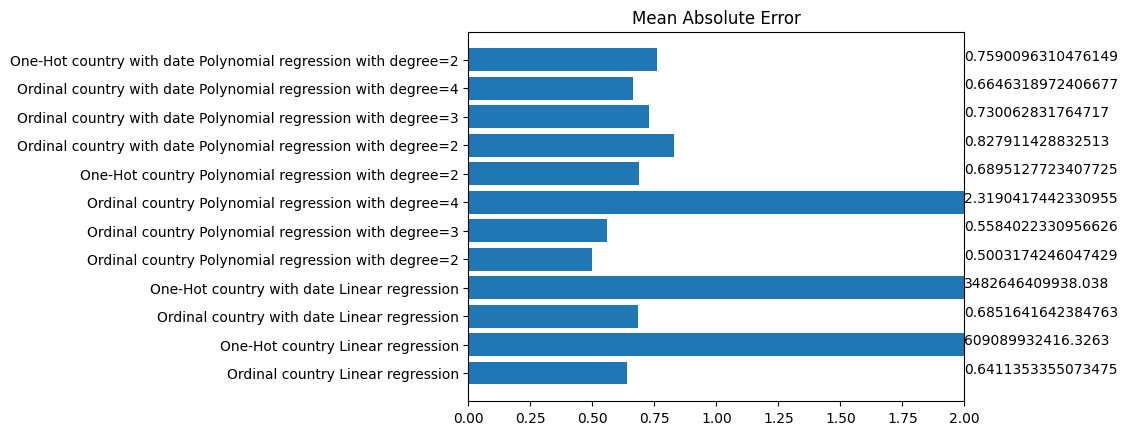

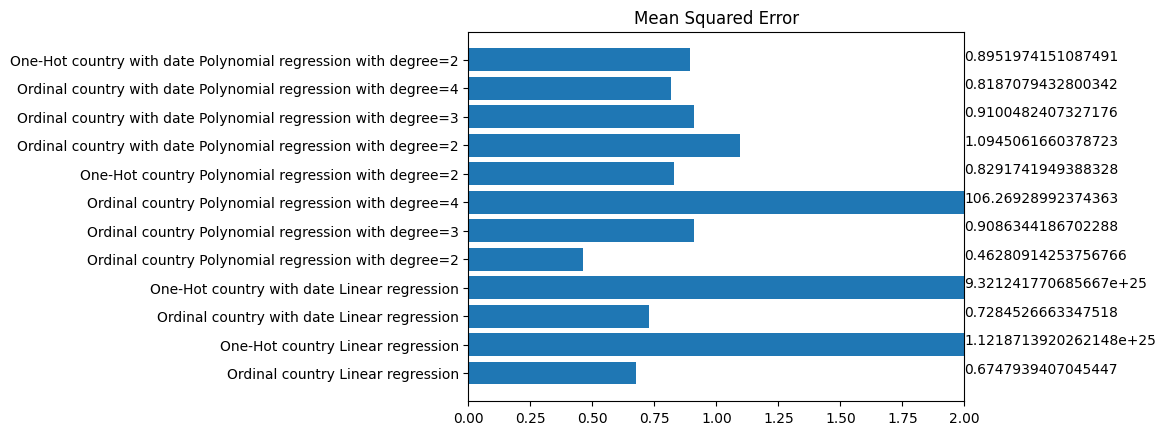

In [365]:
print_mae_mse_metrics(titles, rec_metrics)

As we can see, polynomial regression with 2nd degree and ordinal encoding of countries has the best performance. We will use this model to predict the missing values in column 'var4'.

## Prediction

In [366]:
polynomial_features = PolynomialFeatures(degree=2)
regressor = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                            ("linear_regression", regressor)])

df_nan = df_ord_country[pd.isnull(df['var4'])]
df_nnan = df_ord_country[pd.notnull(df['var4'])]
X = df_nnan.iloc[:, df_nnan.columns != 'var4']
Y = df_nnan['var4']
pipeline.fit(X, Y)
X_req = df_nan.iloc[:, df_nan.columns != 'var4']
X_req['var4'] = pipeline.predict(X_req)
df_nan = X_req
df_nan

,target,var1,var2,var3,var5,var6,var4
325,1,-0.627842,-0.412067,-1.302136,1.515552,1.0,2.313416
326,1,-0.657676,-0.240145,0.321166,-1.873175,1.0,0.651550
327,1,-1.120901,-1.198210,-0.813709,1.104490,1.0,1.425964
328,1,-0.484138,-2.903529,-1.445791,-0.028469,0.0,1.393301
329,0,1.195223,0.429113,0.579745,1.218674,1.0,0.009949
...,...,...,...,...,...,...,...
920,0,0.708541,-0.008370,-1.373963,0.317889,1.0,-1.468323
921,1,-0.199234,-0.551033,-0.138530,-1.580103,0.0,0.204746
922,1,-1.081957,-0.075622,0.924517,-1.484950,1.0,0.594543
923,0,0.421360,0.547516,-1.057922,1.370919,1.0,0.040466


In [367]:
frames = [df_nnan, df_nan]
df_temp = pd.concat(frames)
print("null values in var4 before data inputation ",df['var4'].isna().sum())
print("null values in var4 after data inputation ",df_temp['var4'].isna().sum())

null values in var4 before data inputation  600
null values in var4 after data inputation  0


Let's update the values in all datasets to explore how encoding methods will affect the prediction of categorical data.

In [368]:
df_ord_country['var4'] = df_temp['var4']
df_one_hot_country['var4'] = df_temp['var4']
df_ord_country_with_date['var4'] = df_temp['var4']
df_one_hot_country_with_date['var4'] = df_temp['var4']

## Implementing the PCA technique

In [369]:
def sub_mean_val(col):
    m_val = np.mean(col)
    return pd.Series([el - m_val for el in col])

def pca(data, target_c, n_dim):
    target=data[target_c]
    features = data.iloc[:, data.columns!=target_c]

    # Substract mean values
    features = features.apply(sub_mean_val, axis=0)

    # Calculate covaruance matrix
    cov_mat = np.cov(features.T)

    # Find eigenvalues and eigenvectors
    e_val, e_vec = np.linalg.eig(cov_mat)
    e_val = np.real(e_val)
    e_vec = np.real(e_vec)
    e_pairs = list(zip(np.abs(e_val), e_vec.T))
    e_pairs.sort(key= lambda x: x[0], reverse=True)
    W = np.array(list(map(lambda x: x[1],e_pairs[:n_dim])))

    # redusing the dimensionality
    red_data = pd.DataFrame(np.dot(features,W.T), columns=['component'+str(i) for i in range (1, n_dim+1)])
    red_data[target_c]=target

    return red_data
    

In [370]:
def print_scatter_3d_plot_for_target_with_two_val(red_data, target_c, title):
    red_data_1 = red_data.loc[red_data[target_c]==1]
    red_data_0 = red_data.loc[red_data[target_c]==0]
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    ax.scatter(red_data_1['component1'],red_data_1['component2'],red_data_1['component3'], color='g', label='target=1')
    ax.scatter(red_data_0['component1'],red_data_0['component2'],red_data_0['component3'], label='target=0')
    ax.set_xlabel('component 1')
    ax.set_ylabel('component 2')
    ax.set_zlabel('component 3')
    ax.set_title(title)
    ax.legend(loc=1)
    plt.show()

In [371]:
def print_scatter_2d_plot_for_target_with_two_val(red_data, target_c, title):
    red_data_1 = red_data.loc[red_data[target_c]==1]
    red_data_0 = red_data.loc[red_data[target_c]==0]
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(red_data_1['component1'],red_data_1['component2'], color='g', label='target=1')
    ax.scatter(red_data_0['component1'],red_data_0['component2'], label='target=0')
    ax.set_xlabel('component 1')
    ax.set_ylabel('component 2')
    ax.set_title(title)
    ax.legend(loc=1)
    plt.show()

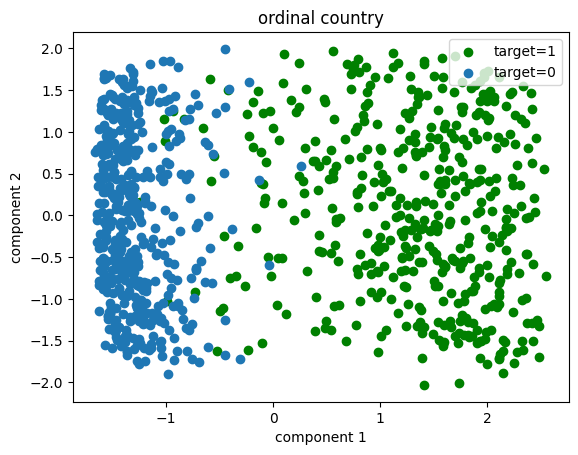

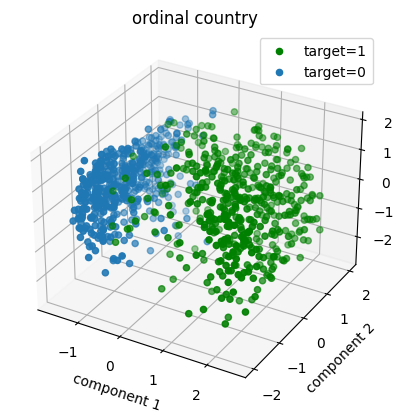

In [372]:
red_df_ord_country_2d = pca(df_ord_country, 'target', 2)
print_scatter_2d_plot_for_target_with_two_val(red_df_ord_country_2d,'target',"ordinal country")
red_df_ord_country_3d = pca(df_ord_country, 'target', 3)
print_scatter_3d_plot_for_target_with_two_val(red_df_ord_country_3d,'target',"ordinal country")

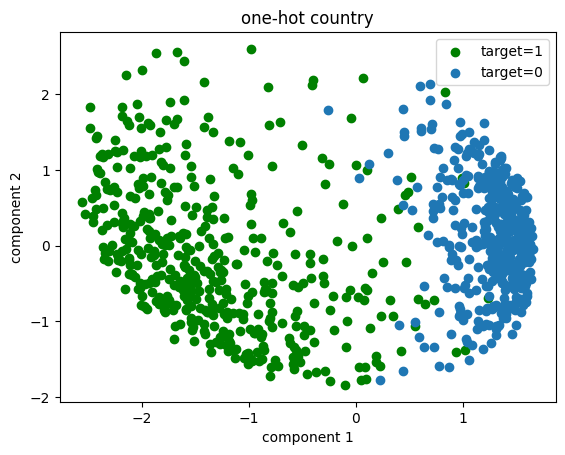

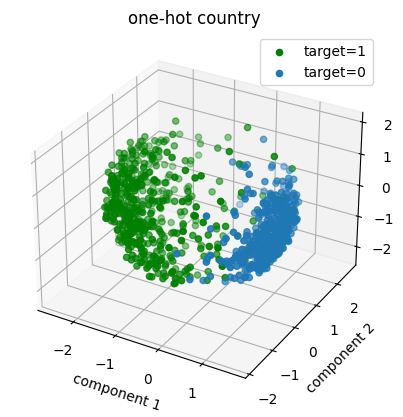

In [373]:
red_df_one_hot_country_2d = pca(df_one_hot_country, 'target', 2)
print_scatter_2d_plot_for_target_with_two_val(red_df_one_hot_country_2d,'target',"one-hot country")
red_df_one_hot_country_3d = pca(df_one_hot_country, 'target', 3)
print_scatter_3d_plot_for_target_with_two_val(red_df_one_hot_country_3d,'target',"one-hot country")

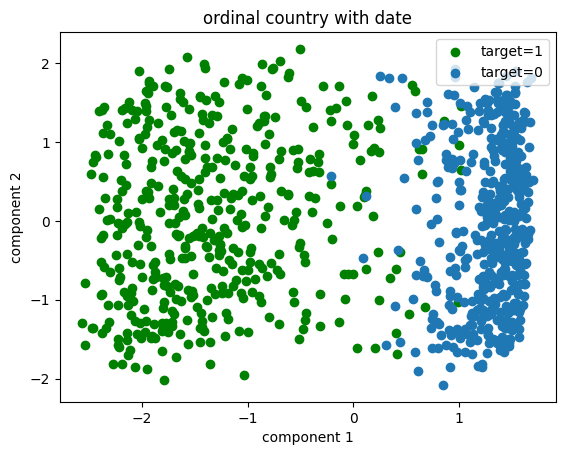

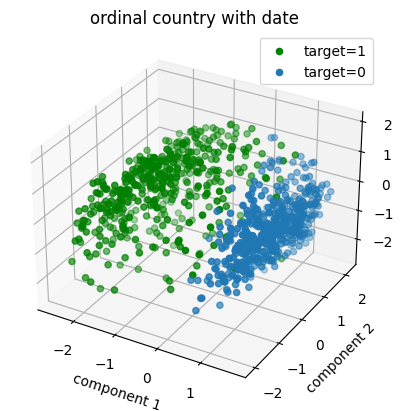

In [374]:
red_df_ord_country_with_date_2d = pca(df_ord_country_with_date, 'target', 2)
print_scatter_2d_plot_for_target_with_two_val(red_df_ord_country_with_date_2d,'target',"ordinal country with date")
red_df_ord_country_with_date_3d = pca(df_ord_country_with_date, 'target', 3)
print_scatter_3d_plot_for_target_with_two_val(red_df_ord_country_with_date_3d,'target',"ordinal country with date")

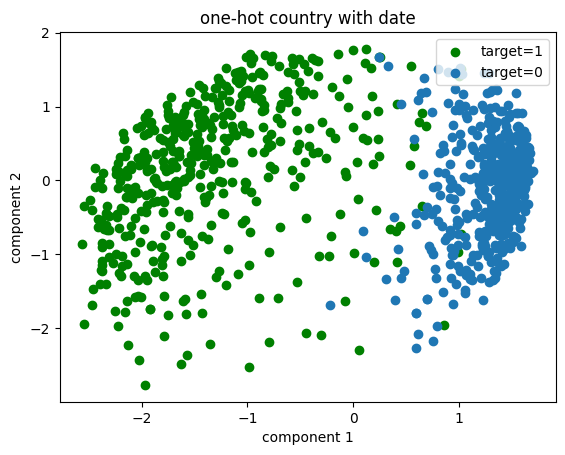

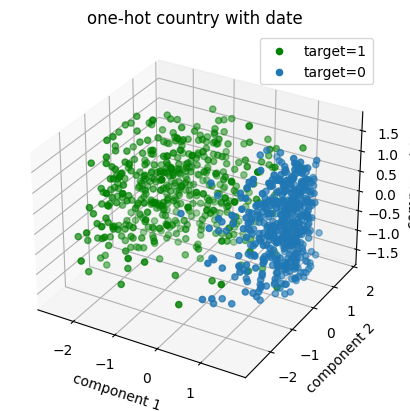

In [375]:
red_df_one_hot_country_with_date_2d = pca(df_one_hot_country_with_date, 'target', 2)
print_scatter_2d_plot_for_target_with_two_val(red_df_one_hot_country_with_date_2d,'target',"one-hot country with date")
red_df_one_hot_country_with_date_3d = pca(df_one_hot_country_with_date, 'target', 3)
print_scatter_3d_plot_for_target_with_two_val(red_df_one_hot_country_with_date_3d,'target',"one-hot country with date")

# Traing

In [376]:
def data_split(data, target_c):
    X = data.iloc[:, data.columns != target_c]
    Y = data[target_c]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
    return X_train, X_test, Y_train, Y_test

In [377]:
from sklearn.model_selection import GridSearchCV

def grid_search(params, classifier, X_train, X_test, Y_train, Y_test):
    grid_search_clf = GridSearchCV(estimator=classifier(),
                               cv=3, scoring='f1',
                               param_grid=params
                               )
    grid_search_clf.fit(X_train, Y_train)
    best_params = grid_search_clf.best_params_

    Y_pred = grid_search_clf.predict(X_test)
    return metrics.f1_score(Y_test, Y_pred), best_params

## Logistic regression

In [378]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def use_lr(data, target_c, title):
    X_train, X_test, Y_train, Y_test = data_split(data, target_c)
    regressor = LogisticRegression(solver='liblinear')
    scores = cross_val_score(regressor, X_train, Y_train,
                             cv=3, scoring='f1')
    avg_score = np.mean(scores)
    return avg_score, title+' Logistic regression'

## Knn

In [379]:
from sklearn.neighbors import KNeighborsClassifier

def use_knn(data, target_c, title):
    X_train, X_test, Y_train, Y_test = data_split(data, target_c)
    param_grid = {'n_neighbors':list(range(1, 12)),
                'weights':['uniform', 'distance'],
                'metric':['manhattan','euclidean','cosine']
                }

    scores, params = grid_search(param_grid, KNeighborsClassifier, X_train, X_test, Y_train, Y_test)
    return scores, title+' KNN with best params: '+str(params)

## Naive Bayes

In [380]:
from sklearn.naive_bayes import GaussianNB

def use_nb(data, target_c, title):
    X_train, X_test, Y_train, Y_test = data_split(data, target_c)
    gauss_nb = GaussianNB()
    scores = cross_val_score(gauss_nb, X_train, Y_train,
                             cv=3, scoring='f1')
    avg_score = np.mean(scores)
    return avg_score, title+' Naive Bayes'

We'll use an average F1 score in order to compare average performance of different models using cross validation with 3 folds. 

In [381]:
def print_f1_metrics(titles, metrics):
    f1 = []
    for metric in metrics:
        temp_f1 = metric
        f1.append(temp_f1)

    plt.barh(titles, f1)   
    for i in range(len(titles)):
        plt.text(1,i,f1[i])
    
    plt.xlim([0,1])
    plt.title('F1')
    plt.show()

In [382]:
def calculate_and_print_metrics(data_frames, target_c, data_titles):
    temp_m = []
    temp_t = []
    for i in range (0, len(data_frames)):
        m, t = use_lr(data_frames[i], target_c, data_titles[i])
        temp_m.append(m)
        temp_t.append(t)
        m, t = use_knn(data_frames[i], target_c, data_titles[i])
        temp_m.append(m)
        temp_t.append(t)
        m, t = use_nb(data_frames[i], target_c, data_titles[i])
        temp_m.append(m)
        temp_t.append(t)
    print_f1_metrics(temp_t, temp_m)

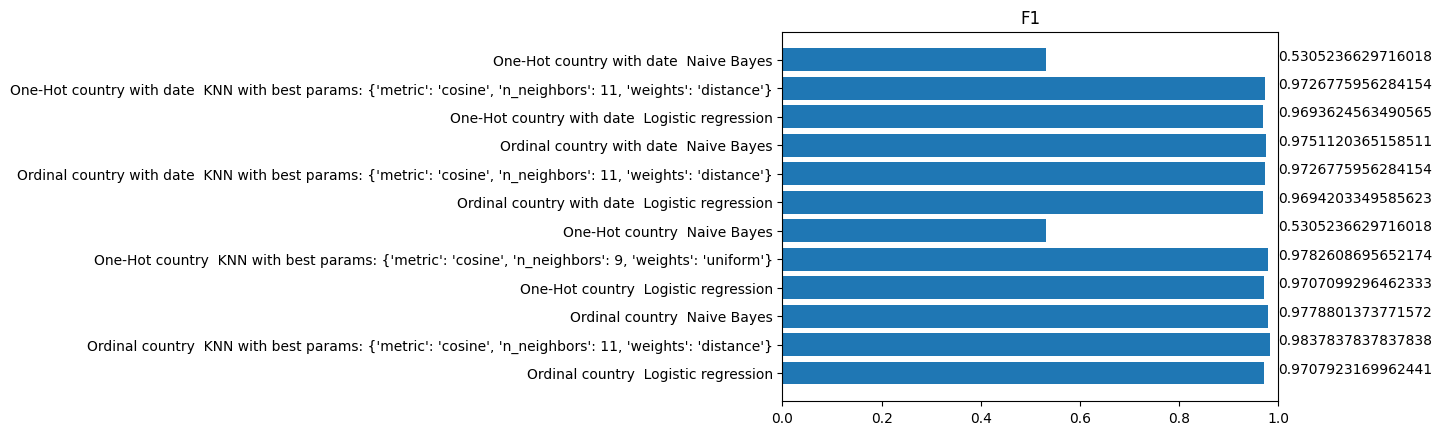

In [383]:
data_frames = [df_ord_country, df_one_hot_country, df_ord_country_with_date, df_one_hot_country_with_date]
data_titles = ['Ordinal country ','One-Hot country ','Ordinal country with date ','One-Hot country with date ']
calculate_and_print_metrics(data_frames, 'target', data_titles)

Almost all models performed well, except for Naive Bayes models with date encoding.

## Features analysis

Since apart of logistic regression, other models do not use assigning weights to certain features, in order to find out which features are the most important, let's look at what weights the logistic regression model assigns for each feature.

In [384]:
def get_lr_coef(data, target_c, title):
    X_train, X_test, Y_train, Y_test = data_split(data, target_c)
    regressor = LogisticRegression(solver='liblinear')
    regressor.fit(X_train, Y_train)
    coef = list(zip(list(X_train.columns) , regressor.coef_[0]))
    coef.sort(key=lambda element: abs(element[1]), reverse=True)

    titles = []
    vals = []
    
    for elem in coef:
        t, v = elem
        titles.append(t)
        vals.append(v)
    
    if len(titles) > 20:
        plt.barh(titles[0:19], vals[0:19])
        for i in range(19):
            plt.text(0,i,vals[i])
        lim = abs(int(vals[0]))
        plt.xlim([-lim-1,lim+1])
        plt.title(title+' weights')
        plt.show()
        print('Most useful features: ',coef[0:10])
        print('Most useless features: ',coef[-10:])
    else:
        plt.barh(titles, vals)   
        for i in range(len(titles)):
            plt.text(0,i,vals[i])
        lim = abs(int(vals[0]))
        plt.xlim([-lim-1,lim+1])
        plt.title(title+' weights')
        plt.show()
        print('Most useful features: ',coef[0:len(coef)*2//5])
        print('Most useless features: ',coef[-len(coef)*2//5:])

    

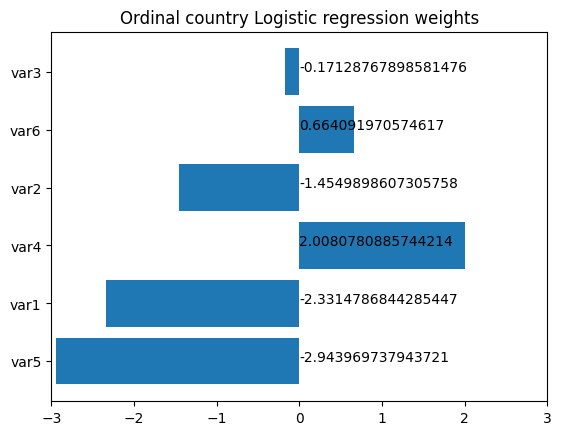

Most useful features:  [('var5', -2.943969737943721), ('var1', -2.3314786844285447)]
Most useless features:  [('var2', -1.4549898607305758), ('var6', 0.664091970574617), ('var3', -0.17128767898581476)]


In [385]:
get_lr_coef(df_ord_country,'target', 'Ordinal country Logistic regression')

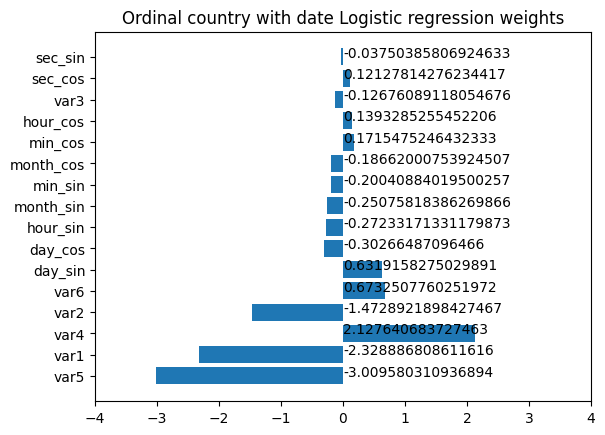

Most useful features:  [('var5', -3.009580310936894), ('var1', -2.328886808611616), ('var4', 2.127640683727463), ('var2', -1.4728921898427467), ('var6', 0.6732507760251972), ('day_sin', 0.6319158275029891)]
Most useless features:  [('min_sin', -0.20040884019500257), ('month_cos', -0.18662000753924507), ('min_cos', 0.1715475246432333), ('hour_cos', 0.1393285255452206), ('var3', -0.12676089118054676), ('sec_cos', 0.12127814276234417), ('sec_sin', -0.03750385806924633)]


In [386]:
get_lr_coef(df_ord_country_with_date,'target', 'Ordinal country with date Logistic regression')

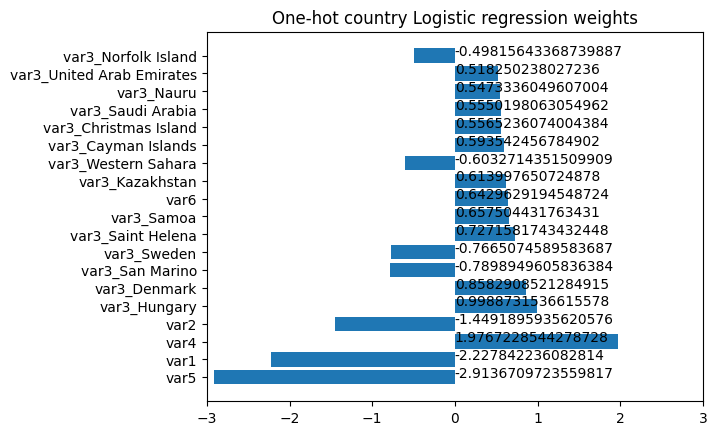

Most useful features:  [('var5', -2.9136709723559817), ('var1', -2.227842236082814), ('var4', 1.9767228544278728), ('var2', -1.4491895935620576), ('var3_Hungary', 0.9988731536615578), ('var3_Denmark', 0.8582908521284915), ('var3_San Marino', -0.7898949605836384), ('var3_Sweden', -0.7665074589583687), ('var3_Saint Helena', 0.7271581743432448), ('var3_Samoa', 0.657504431763431)]
Most useless features:  [('var3_Central African Republic', 2.0634526561449207e-05), ('var3_Vietnam', 1.2631467416017819e-05), ('var3_Myanmar', 1.0701014848182706e-05), ('var3_Netherlands', 5.15380495152e-06), ('var3_Macao', 1.6726766373673048e-06), ('var3_Comoros', 0.0), ('var3_Cook Islands', 0.0), ('var3_Germany', 0.0), ('var3_Guadeloupe', 0.0), ('var3_Marshall Islands', 0.0)]


In [387]:
get_lr_coef(df_one_hot_country,'target', 'One-hot country Logistic regression')

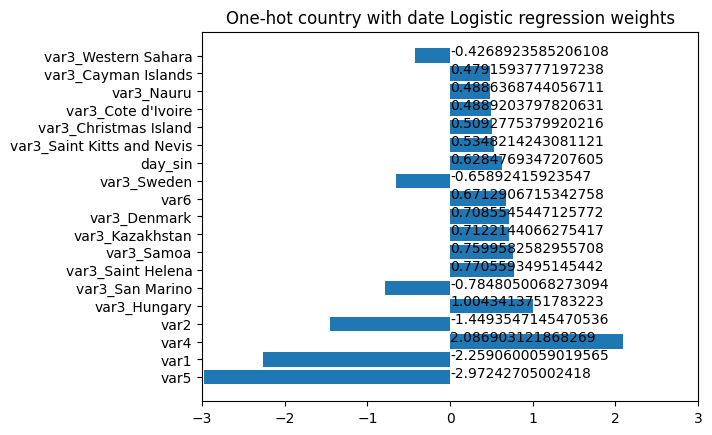

Most useful features:  [('var5', -2.97242705002418), ('var1', -2.2590600059019565), ('var4', 2.086903121868269), ('var2', -1.4493547145470536), ('var3_Hungary', 1.0043413751783223), ('var3_San Marino', -0.7848050068273094), ('var3_Saint Helena', 0.7705593495145442), ('var3_Samoa', 0.7599582582955708), ('var3_Kazakhstan', 0.7122144066275417), ('var3_Denmark', 0.7085545447125772)]
Most useless features:  [('var3_Antigua and Barbuda', 1.6759429518925777e-05), ('var3_Netherlands', -4.613745661957383e-06), ('var3_Macao', -3.087517788866253e-06), ('var3_Myanmar', -2.7849317975175687e-06), ('var3_Vietnam', 5.851758232073884e-07), ('var3_Comoros', 0.0), ('var3_Cook Islands', 0.0), ('var3_Germany', 0.0), ('var3_Guadeloupe', 0.0), ('var3_Marshall Islands', 0.0)]


In [388]:
get_lr_coef(df_one_hot_country_with_date,'target', 'One-hot country with date Logistic regression')

## PCA influence on data models

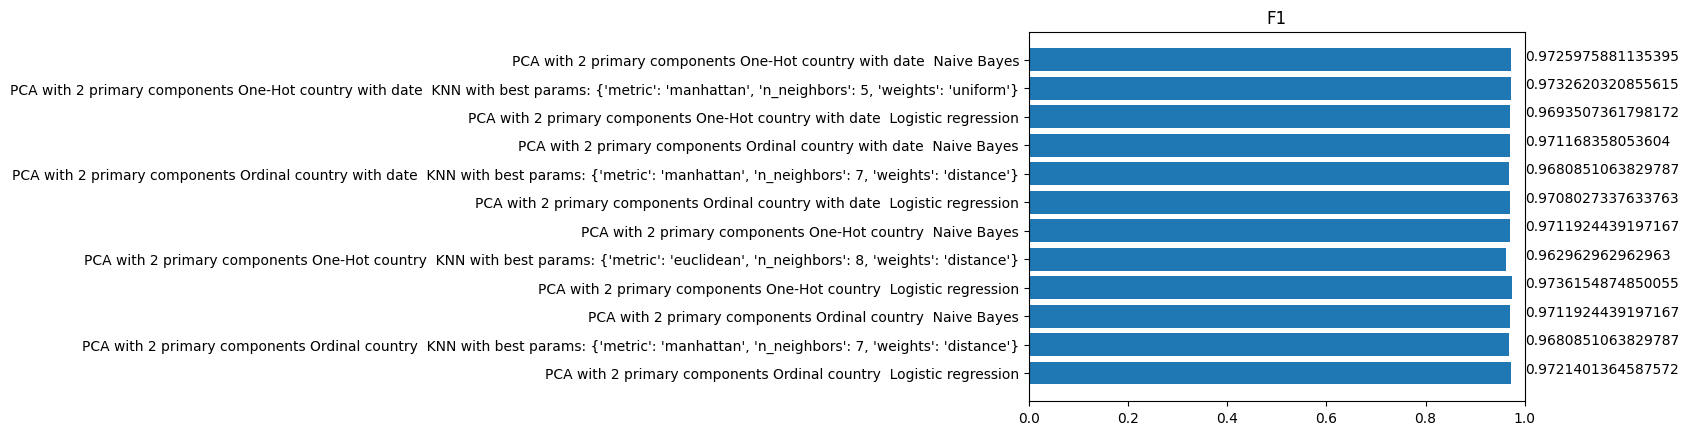

In [389]:
data_frames = [red_df_ord_country_2d, red_df_one_hot_country_2d, red_df_ord_country_with_date_2d, red_df_one_hot_country_with_date_2d]
data_titles = ['PCA with 2 primary components Ordinal country ','PCA with 2 primary components One-Hot country ','PCA with 2 primary components Ordinal country with date ','PCA with 2 primary components One-Hot country with date ']
calculate_and_print_metrics(data_frames, 'target', data_titles)

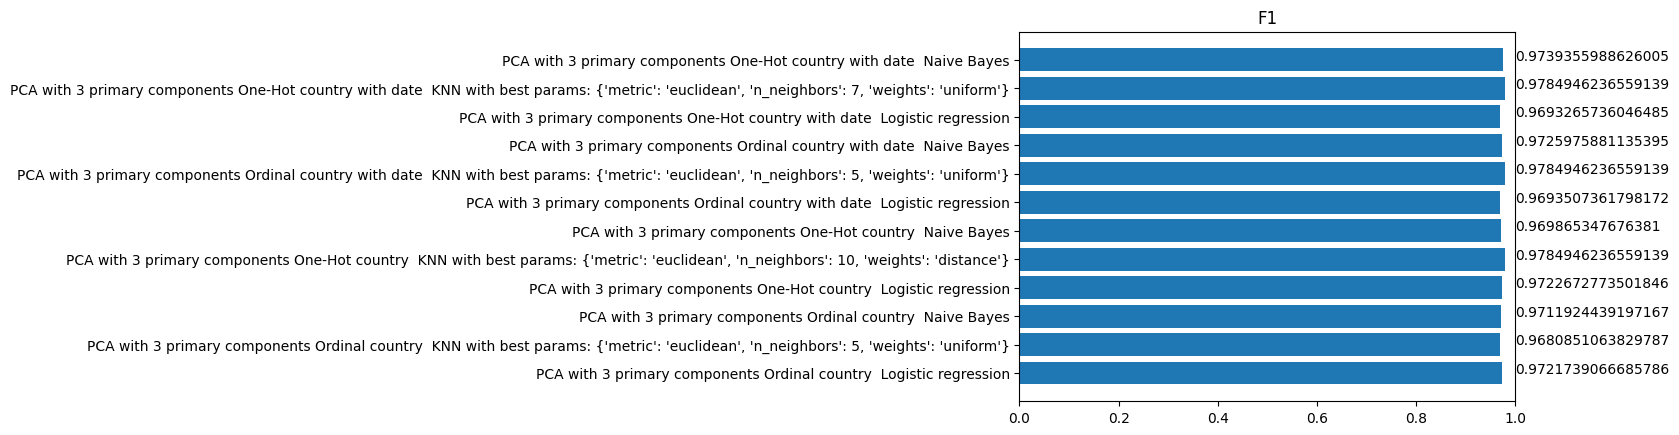

In [390]:
data_frames = [red_df_ord_country_3d, red_df_one_hot_country_3d, red_df_ord_country_with_date_3d, red_df_one_hot_country_with_date_3d]
data_titles = ['PCA with 3 primary components Ordinal country ','PCA with 3 primary components One-Hot country ','PCA with 3 primary components Ordinal country with date ','PCA with 3 primary components One-Hot country with date ']
calculate_and_print_metrics(data_frames, 'target', data_titles)